In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

In [173]:
df = pd.read_csv("Gym_Progress_Dataset.csv")

In [174]:
df.head()

Day  Weight_kg  Calories_Intake  Protein_Intake_g  \
0  2025-01-01       71.5             3209                70   
1  2025-01-02       69.6             2584               150   
2  2025-01-03       71.9             2927               148   
3  2025-01-04       74.6             3216                85   
4  2025-01-05       69.3             2045               145   

   Workout_Duration_min  Steps_Walked  
0                    41          6820  
1                    40          4898  
2                    89          9546  
3                    20          2077  
4                    24          9577

In [175]:
df['Day'] = pd.to_datetime(df['Day'])


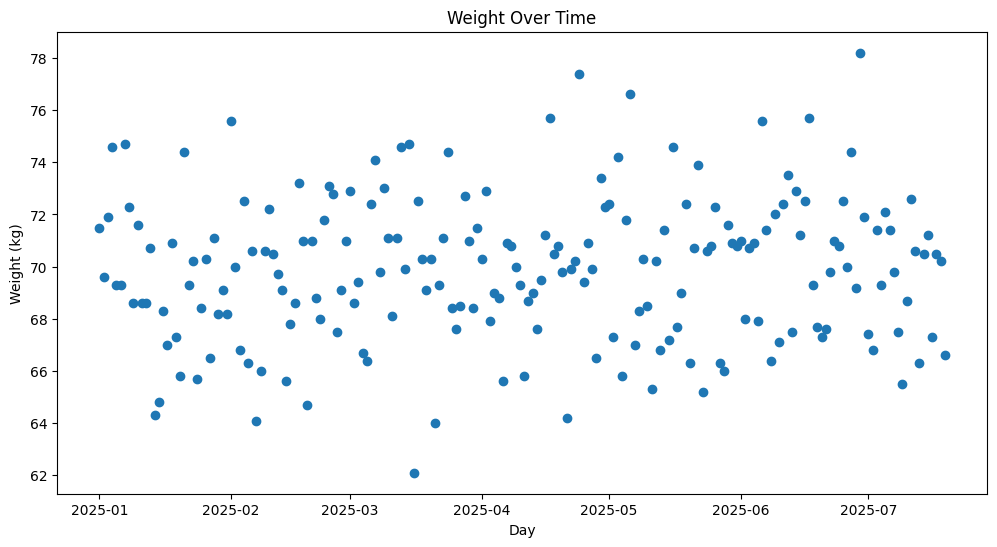

In [176]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Day'] , df['Weight_kg'])
plt.title("Weight Over Time")
plt.xlabel("Day")
plt.ylabel("Weight (kg)")
plt.show()

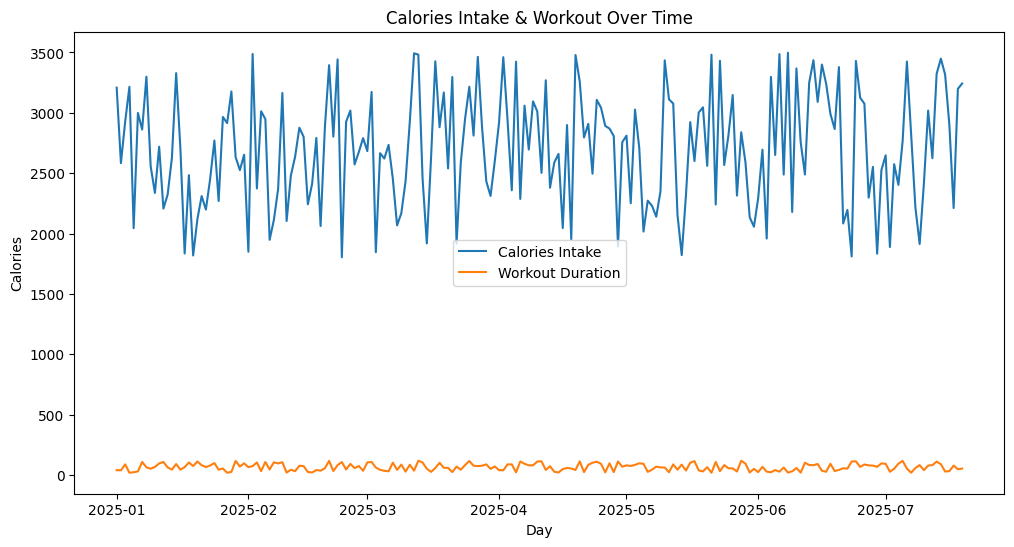

In [177]:
plt.figure(figsize=(12,6))
plt.plot(df['Day'], df['Calories_Intake'], label='Calories Intake')
plt.plot(df['Day'], df['Workout_Duration_min'], label='Workout Duration')
plt.title("Calories Intake & Workout Over Time")
plt.xlabel("Day")
plt.ylabel("Calories")
plt.legend()
plt.show()

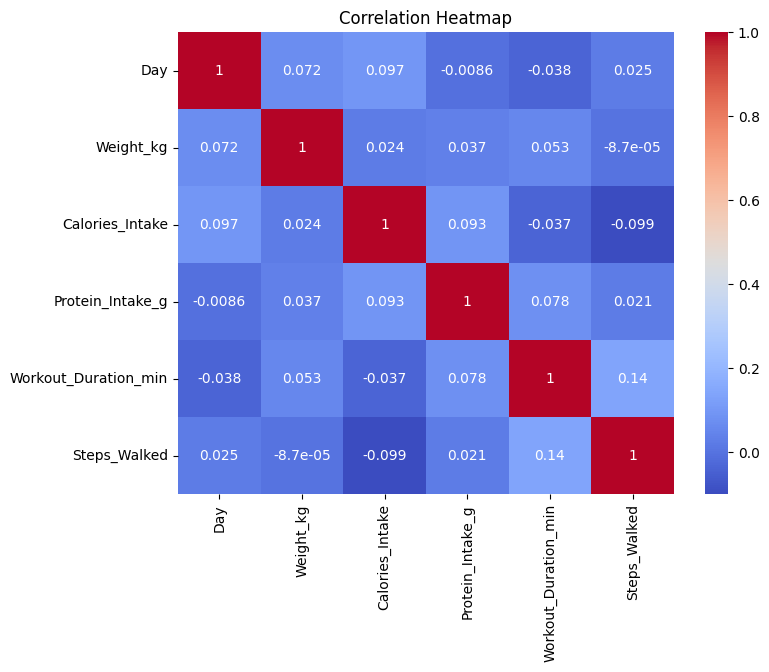

In [178]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [179]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

df_clean = df.copy()

df_clean = df_clean.sort_values(by='Day')


df_clean['Calories_3D_Avg'] = df_clean['Calories_Intake'].rolling(window=3, min_periods=1).mean()
df_clean['Steps_3D_Avg'] = df_clean['Steps_Walked'].rolling(window=3, min_periods=1).mean()
df_clean['Weight_7D_Avg'] = df_clean['Weight_kg'].rolling(window=7, min_periods=1).mean()


X = df_clean[['Calories_3D_Avg', 'Steps_3D_Avg', 'Protein_Intake_g', 'Workout_Duration_min']]
y = df_clean['Weight_7D_Avg']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)


importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(importance)

                Feature  Coefficient
0       Calories_3D_Avg     0.196948
2      Protein_Intake_g    -0.006704
3  Workout_Duration_min    -0.022845
1          Steps_3D_Avg    -0.025238


In [180]:
from sklearn.preprocessing import StandardScaler


X = df_clean[['Calories_3D_Avg', 'Steps_3D_Avg', 'Protein_Intake_g', 'Workout_Duration_min']]
y = df_clean['Weight_7D_Avg']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [181]:
x_train , x_test , y_train , y_test  = train_test_split (X , y, test_size = 0.2 , random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)


y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)


print("Linear Regression mae:",mae)

Linear Regression mae: 0.7607317755275744


In [182]:

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=500,
     max_depth=10,
    random_state=42
)

model.fit(x_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=500, random_state=42)

In [183]:

from sklearn.metrics import mean_absolute_error

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)

print("Random Forest MAE:", mae)


Random Forest MAE: 0.7337593412129586


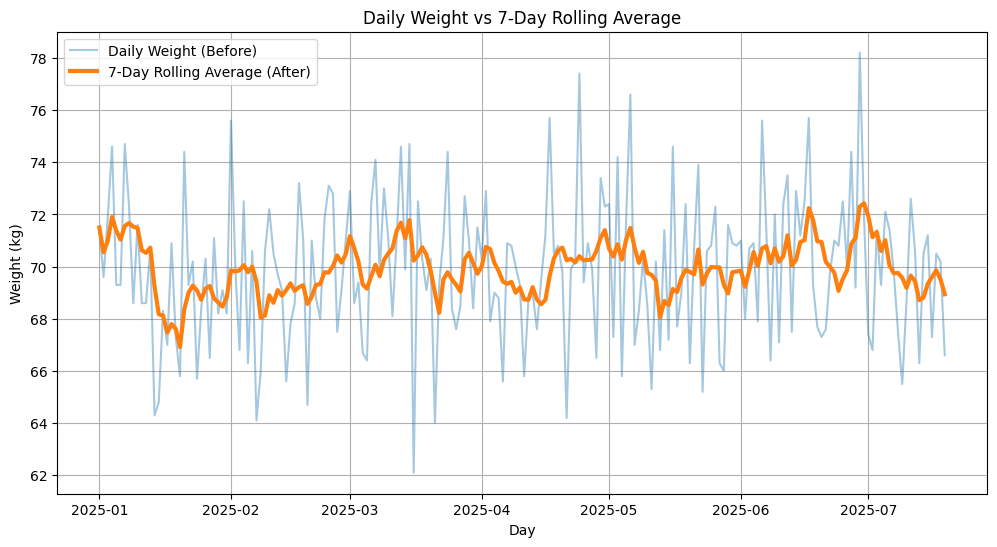

In [184]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))


plt.plot(df_clean['Day'], df_clean['Weight_kg'],
         label='Daily Weight (Before)',
         alpha=0.4)


plt.plot(df_clean['Day'], df_clean['Weight_7D_Avg'],
         label='7-Day Rolling Average (After)',
         linewidth=3)

plt.title("Daily Weight vs 7-Day Rolling Average")
plt.xlabel("Day")
plt.ylabel("Weight (kg)")
plt.legend()
plt.grid(True)
plt.show()


In [185]:
import pandas as pd
import matplotlib.pyplot as plt


future_days = 30


last_weight_avg = df_clean['Weight_7D_Avg'].iloc[-1]

future_dates = pd.date_range(
    start=df_clean['Day'].iloc[-1] + pd.Timedelta(days=1),
    periods=future_days
)
predicted_weight = [last_weight_avg] * future_days



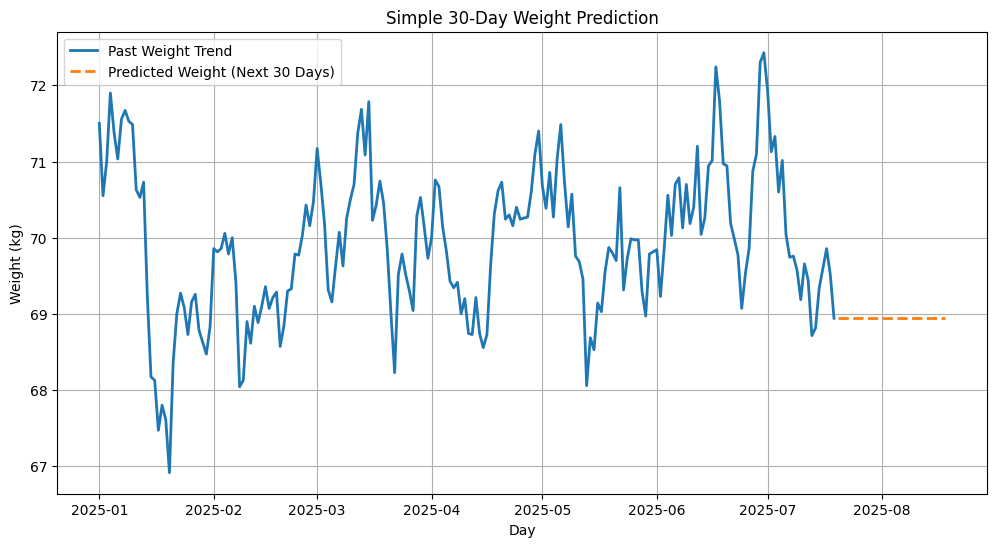

In [186]:
plt.figure(figsize=(12,6))


plt.plot(df_clean['Day'], df_clean['Weight_7D_Avg'],
         label='Past Weight Trend', linewidth=2)


plt.plot(future_dates, predicted_weight,
         '--', label='Predicted Weight (Next 30 Days)', linewidth=2)

plt.title("Simple 30-Day Weight Prediction")
plt.xlabel("Day")
plt.ylabel("Weight (kg)")
plt.legend()
plt.grid(True)
plt.show()
